# Example of XmR control charts

Process behaviour charts are used to determine if the variation of a process is stable and predictable, that is, in a state of statistical control. In-control variation arises from chance or common causes; no changes or adjustments to the process are needed. The charts can be used to predict future performance. Out-of-control variation arises from special or assignable causes. These charts help identify the special causes in order minimize or eliminate their effect.

For the X chart, data are collected using rational sampling of size 1. The individual values are plotted in time order. A central line (average) is plotted. Control limits above and below the central line are plotted.

$$
    \begin{align}
        UCL_X, LCL_X & = \overline{X} \pm 3 \times \text{Sigma(X)} \\
                     & = \overline{X} \pm 3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_2$ can be found in tables of control chart constants. It is a rescaling constant that changes an average range to a standard deviation. The value of $d_2$ changes as the subgroup size $n$ changes. It is common to use a moving range of subgroup size 2.

 The moving range between successive pairs of points are calculated and plotted on the mR chart. A central line (average moving range) is plotted. Control limits above and below the central line are plotted.
    
$$
    \begin{align}
        UCL_R, LCL_R & = \overline{R} \pm 3 \times \text{Sigma(R)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \text{Sigma(X)} \\
                     & = \overline{R} \pm 3 \times d_3 \times \frac{\overline{R}}{d_2}
    \end{align}
$$

The constant $d_3$ can be found in tables of control chart constants. It is a rescaling constant that changes a a standard deviation of individual values to a standard deviation of range values. The value of $d_3$ is a function of subgroup size.

# Datasense library

## First-time user

Do this if this is your first-time installation.

Install `git`. If using `Anaconda`:

    conda install git

Then install datasense:

    pip install --user -e "git+https://github.com/gillespilon/datasense#egg=datasense"

## Updating the library

Do this if you are updating a previously-installed version of `datasense`.

    pip install --user --upgrade -e "git+https://github.com/gillespilon/datasense#egg=datasense"

# Data

In this notebook, a data set is created in the notebook. There is a function if you wish to read your data from a csv, xlsx, or ods file. The file should have two columns, each with a column label. The first one is the sample ID and the second one is the data.

# Control chart rules

**Rule one**. One point outside the three-sigma limits. Is used with the X, mR, Xbar, and R charts.

**Rule two**. Two-out-of-three successive points on the same side of the central line
and both are more than two sigma units away from the central line. Is used with the X and Xbar charts.

**Rule three**. Four-out-of-five successive points on the same side of the central line and are more than one sigma units away from the central line. Is used with the X and Xbar charts.

**Rule four**. Eight successive points all on the same side of the central line. Is used with the X and Xbar charts.

# References

Wheeler, Donald J., and Rip Stauffer. 2017. “When Should We Use Extra Detection Rules? Using process behavior charts effectively.” *Quality Digest* (2017-10-02).

# Code

In [1]:
import time

In [2]:
from datasense import control_charts as cc
import matplotlib.pyplot as plt
import datasense as ds
import pandas as pd

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
data_file = 'x_mr_example'
x_chart_title = 'Individuals Control Chart'
x_chart_ylabel = 'Measurement X (units)'
x_chart_xlabel = 'Sample'
mr_chart_title = 'Moving Range Control Chart'
mr_chart_ylabel = 'Measurement mR (units)'
mr_chart_xlabel = 'Sample'
colour = '#33bbee'
figsize = (8, 6)
output_url = 'x_mr_example.html'
header_title = 'x_mr_example'
header_id = 'x-mr-example'

In [5]:
def main():
    start_time = time.time()
    original_stdout = ds.html_begin(
        output_url=output_url,
        header_title=header_title,
        header_id=header_id
    )
    data = create_data()  # use the data in this notebook
#     data = ds.read_file(
#         file_name=f'{data_file}.csv',
#         index_columns=['Sample']
#     )
#     data = ds.read_file(
#         file_name=f'{data_file}.xlsx',
#         index_columns=['Sample']
#     )
#     data = ds.read_file(
#         file_name=f'{data_file}.ods',
#         index_columns=['Sample']
#     )
    ds.page_break()
    x_chart(df=data)
    ds.page_break()
    mr_chart(df=data)
#     help(cc.X)
#     help(cc.mR)
    stop_time = time.time()
    ds.page_break()
    ds.report_summary(
        start_time=start_time,
        stop_time=stop_time
    )
    ds.html_end(
        original_stdout=original_stdout,
        output_url=output_url
    )

In [6]:
def create_data() -> pd.DataFrame:
    '''
    Creates a dataframe.
    This function is for demonstration purposes.
    '''
    df = {
        'Sample':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
        'X':       [25.0, 24.0, 38.5, 22.4, 23.1, 13.9, 13.9,
                    10.0, 13.3, 10.0, 16.0, 16.0, 16.0]
    }
    df = pd.DataFrame(df)
    df = df.set_index('Sample')
    # df = {
    #     'X':       [25.0, 24.0, 38.5, 22.4, 23.1, 13.9, 13.9,
    #                 10.0, 13.3, 10.0, 16.0, 16.0, 16.0]
    # }
    # df = pd.DataFrame(df)
    return df

In [7]:
def x_chart(df: pd.DataFrame) -> None:
    '''
    Creates an X control chart.
    Identifies out-of-control points.
    Adds chart and axis titles.
    Saves the figure in svg format.
    '''
    fig = plt.figure(figsize=figsize)
    x = cc.X(data=df)
    ax = x.ax(fig)
    ax.axhline(
        y=x.sigmas[+1],
        linestyle='--',
        dashes=(5, 5),
        color=colour,
        alpha=0.5
    )
    ax.axhline(
        y=x.sigmas[-1],
        linestyle='--',
        dashes=(5, 5),
        color=colour,
        alpha=0.5
    )
    ax.axhline(
        y=x.sigmas[+2],
        linestyle='--',
        dashes=(5, 5),
        color=colour,
        alpha=0.5
    )
    ax.axhline(
        y=x.sigmas[-2],
        linestyle='--',
        dashes=(5, 5),
        color=colour,
        alpha=0.5
    )
    cc.draw_rules(x, ax)
    ax.set_title(
        label=x_chart_title,
        fontweight='bold'
    )
    ax.set_ylabel(ylabel=x_chart_ylabel)
    ax.set_xlabel(xlabel=x_chart_xlabel)
    fig.savefig(fname=f'{data_file}_x.svg')
    ds.html_figure(file_name=f'{data_file}_x.svg')
    print(
       f'X Report\n'
       f'============\n'
       f'UCL        : {x.ucl.round(3)}\n'
       f'Xbar       : {x.mean.round(3)}\n'
       f'LCL        : {x.lcl.round(3)}\n'
       f'Sigma(X)   : {x.sigma.round(3)}\n'
    )

In [8]:
def mr_chart(df: pd.DataFrame) -> None:
    '''
    Creates an mR control chart.
    Identifies out-of-control points.
    Adds chart and axis titles.
    Saves the figure in svg format.
    '''
    fig = plt.figure(figsize=figsize)
    mr = cc.mR(data=df)
    ax = mr.ax(fig)
    cc.draw_rule(mr, ax, *cc.points_one(mr), '1')
    ax.set_title(
        label=mr_chart_title,
        fontweight='bold'
    )
    ax.set_ylabel(ylabel=mr_chart_ylabel)
    ax.set_xlabel(xlabel=mr_chart_xlabel)
    fig.savefig(fname=f'{data_file}_mr.svg')
    ds.html_figure(file_name=f'{data_file}_mr.svg')
    print(
       f'mR Report\n'
       f'============\n'
       f'UCL        : {mr.ucl.round(3)}\n'
       f'mRbar      : {mr.mean.round(3)}\n'
       f'LCL        : {round(mr.lcl, 3)}\n'
       f'Sigma(mR)  : {mr.sigma.round(3)}\n'
    )

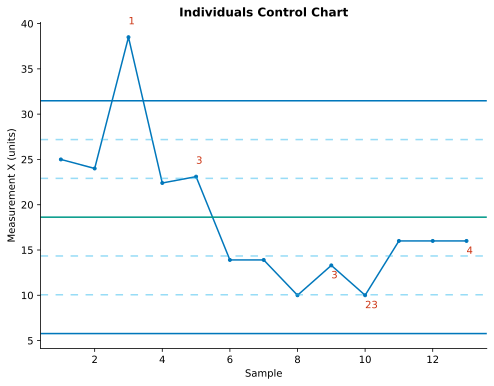

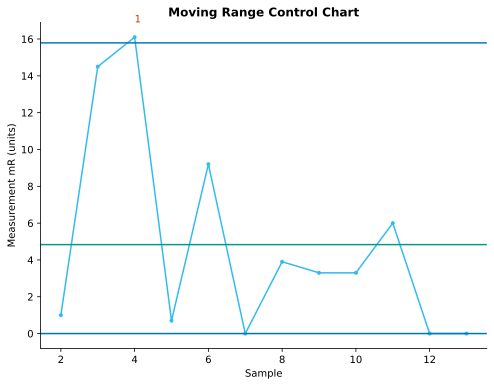

In [9]:
if __name__ == '__main__':
    main()